In [1]:
# Import the libraries

import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups

In [2]:
# Load the dataset
data = fetch_20newsgroups()


In [3]:
# Get the text categories
text_categories = data.target_names

In [4]:
# define the training set
train_data = fetch_20newsgroups(subset="train", categories=text_categories)

# define the test set
test_data = fetch_20newsgroups(subset="test", categories=text_categories)

In [5]:
print(f"We have {len(text_categories)} unique classes")
print(f"We have {len(train_data.data)} training samples")
print(f"We have {len(test_data.data)} test samples")

We have 20 unique classes
We have 11314 training samples
We have 7532 test samples


Importing necessary libraries for text feature extraction (TF-IDF) and a Naive Bayes classifier.

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
# from sklearn.pipeline import make_pipeline

In [ ]:
'''# Build the model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
# Train the model using the training data
model.fit(train_data.data, train_data.target)
# Predict the categories of the test data
predicted_categories = model.predict(test_data.data)'''

#### Text Classification Model Training and Testing

In [7]:
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Transform the training data into TF-IDF features
train_features = vectorizer.fit_transform(train_data.data)

# Create the Multinomial Naive Bayes classifier
mnb = MultinomialNB()

# Train the classifier using the TF-IDF features and corresponding labels
mnb.fit(train_features, train_data.target)

# Transform the test data into TF-IDF features
test_features = vectorizer.transform(test_data.data)

# Predict the categories of the test data
predicted_categories = mnb.predict(test_features)


In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score

Accuracy Visualization

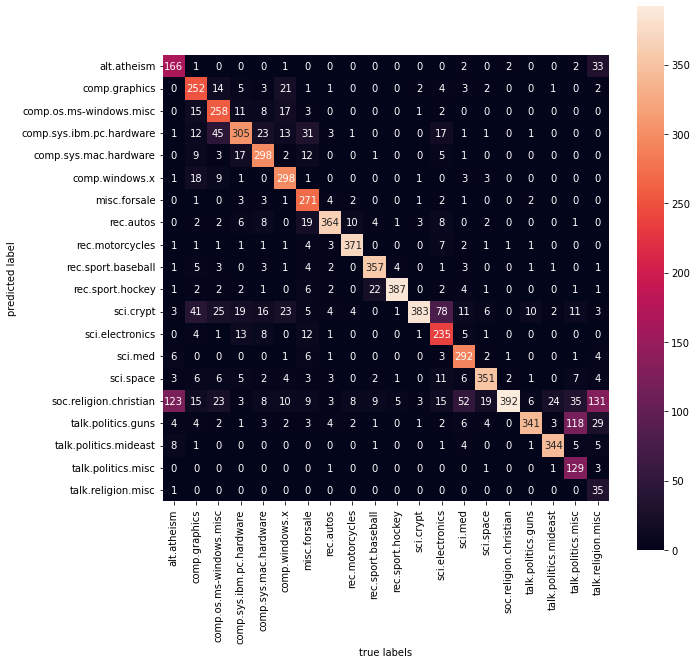

The accuracy is 0.7738980350504514


In [9]:
# plot the confusion matrix
plt.figure(figsize=(10,10))
mat = confusion_matrix(test_data.target, predicted_categories)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d", xticklabels=train_data.target_names,yticklabels=train_data.target_names)
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()
print("The model accuracy is {}".format(accuracy_score(test_data.target, predicted_categories)))
